In [169]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Checking the dataset**

In [170]:
HousePrice = pd.read_csv("./train.csv")
HousePrice.shape

(1460, 81)

In [171]:
HousePrice["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [172]:
HousePrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [173]:
import seaborn as sb
import matplotlib.pyplot as plt

**Houses sold by year and their sale condition**

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       

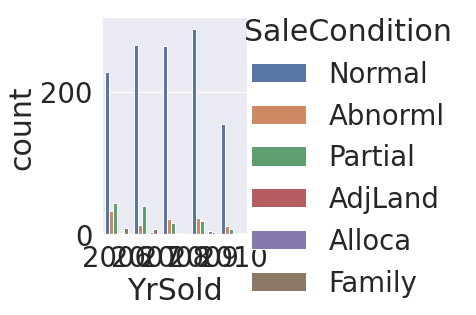

In [174]:
sb.catplot(x ="YrSold", hue ="SaleCondition",
kind ="count", data = HousePrice)

**Houses sold by year and their Sale Type**


SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		

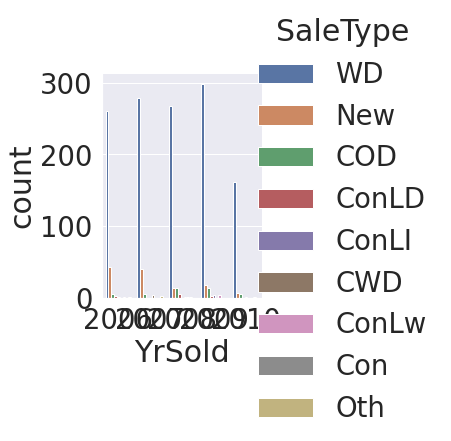

In [175]:
sb.catplot(x ="YrSold", hue ="SaleType",
kind ="count", data = HousePrice)

**Sale Price upon year sold with Type of Street(Paved/Gravel)**

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

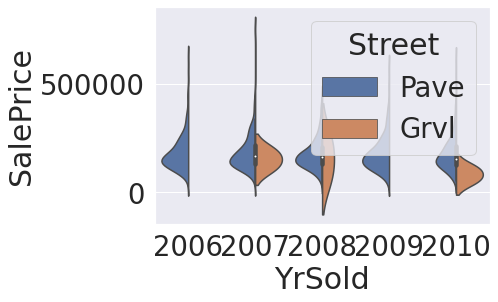

In [176]:
sb.violinplot(x ="YrSold", y ="SalePrice", hue ="Street",
data = HousePrice, split = True)

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

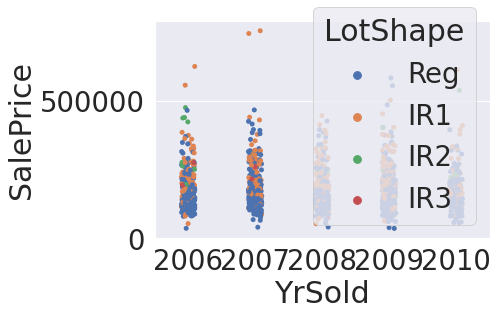

In [177]:
sb.stripplot(y = 'SalePrice', x = 'YrSold', data = HousePrice, hue="LotShape")

**Sale Price by Month Sold and conditon of Garage**

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

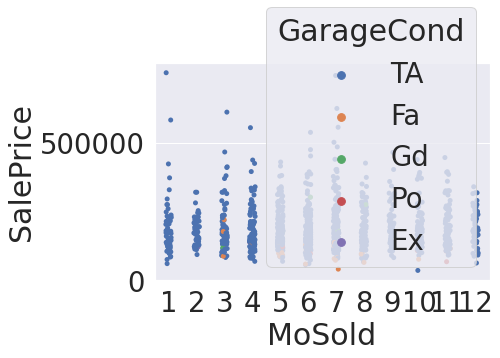

In [178]:
sb.stripplot(y = 'SalePrice', x = 'MoSold', data = HousePrice, hue='GarageCond')

**Porch Area with Respect to Sale Price**

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


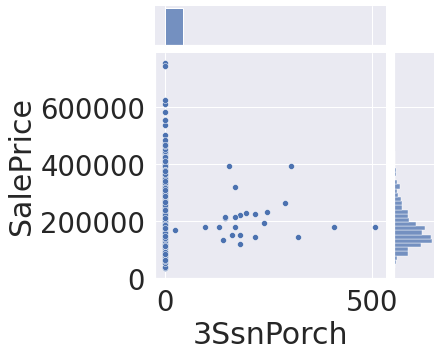

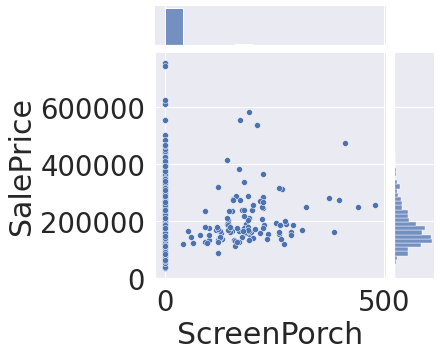

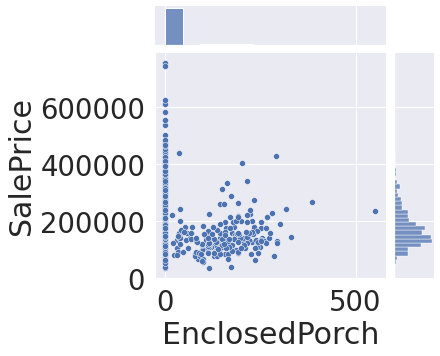

In [179]:
sb.jointplot(x="3SsnPorch", y="SalePrice", data=HousePrice, height=5)
sb.jointplot(x="ScreenPorch", y="SalePrice", data=HousePrice, height=5)
sb.jointplot(x="EnclosedPorch", y="SalePrice", data=HousePrice, height=5)

# **Feature Selection**

**Correlation Matrix for all the Features**
* **Using this check the relation between features and SalePrice**
* Anything in more warmer for SalePrice will be taken as a feature

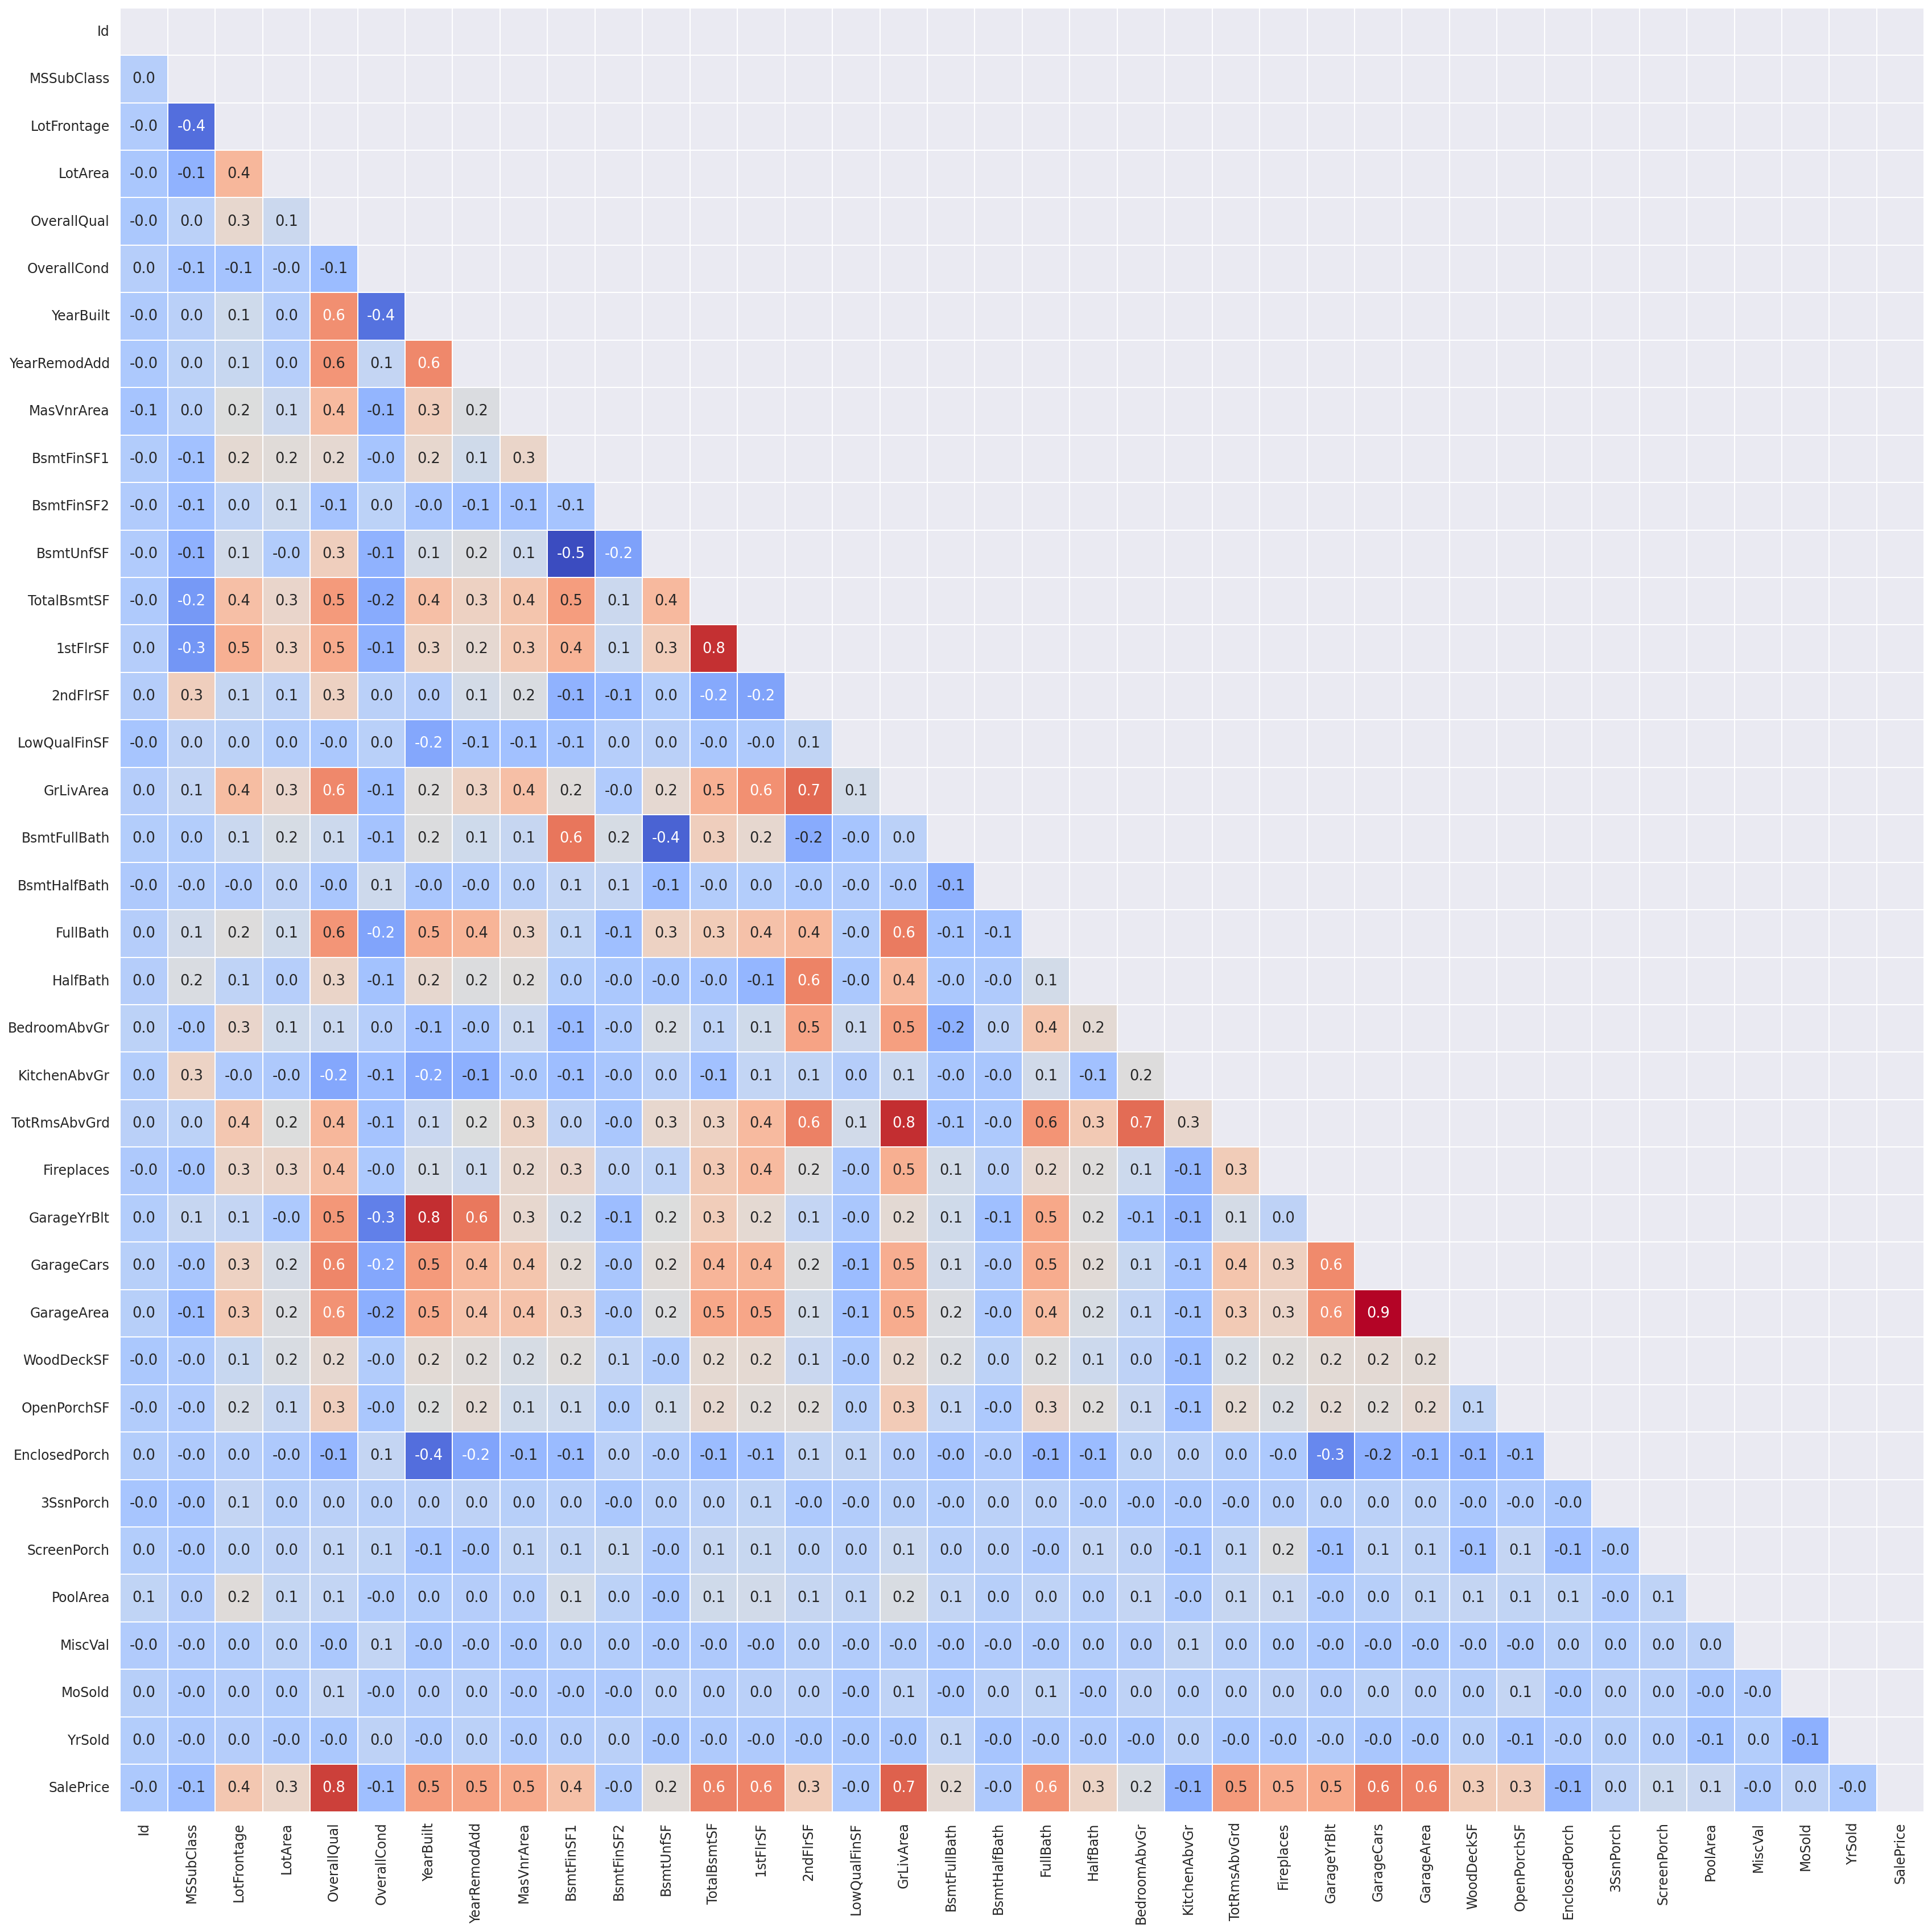

In [180]:
correlation_matrix = HousePrice.corr()

# Returns copy of array with upper part of the triangle (which will be masked/hidden)
mask = np.triu(correlation_matrix.corr())

sb.set(font_scale=1.1)
plt.figure(figsize=(30, 30), dpi=140)
sb.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

**We can see from above that features like**
* id
* MSSubClass
* OverallCond
* BsmtUnfSF
* LowQualFinSF
* BsmtHalfBath
* KitchenAbvGr
* EnclosedPorch
* 3SsnPorch
* ScreenPorch
* PoolArea
* MiscVal
* MoSold
* YrSold

**Dont have much impact in the SalesPrice**

**Checking For Null Values**
* Removing all featres with more than half of total rows of null values 

In [181]:
pd.set_option('display.max_rows', None)
temp = HousePrice.isnull().sum()
temp.sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [182]:
# # Columns with missing values in more than half number of rows
# null_cols = [col for col in HousePrice.columns if HousePrice[col].isnull().sum() > len(HousePrice)/2]
# null_cols

In [183]:
# Columns with missing values in more than half number of rows
null_cols_temp = [col for col in HousePrice.columns if HousePrice[col].isnull().sum() > 0]
null_cols_temp

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [184]:
HousePrice.drop(null_cols_temp, axis=1, inplace=True)

# **Creating a custom Feature for Classification**

# Feature handling

In [185]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew


train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [186]:
categorical_feature_mask = train.dtypes==object
categorical_feature_mask.value_counts()

True     43
False    38
dtype: int64

In [187]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [188]:
print(len(train.columns))
train = train.drop((missing_data[missing_data['Total'] > 100]).index,1)

81


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [189]:
train.isnull().sum().sort_values(ascending=False).head(20)
print(len(train.columns))

75


In [190]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [191]:
# train.isna().any()
train.columns[train.isna().any()].tolist()

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [192]:
train["BsmtCond"].head()

0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object

In [193]:
#dealing with missing data
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [194]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageCond      78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
Utilities        2
Functional       2
BsmtHalfBath     2
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
dtype: int64

### Categorical data filtering for  data

In [195]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [196]:
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### Checking Which variales are numerical values from the columns that contain null vlues

In [197]:
# Checking how many categorical values in the columsn with null 

cols_with_null = train.columns[train.isna().any()].tolist()
print("Columns with Null:")
print(cols_with_null)
print()
print()
print("cateogrical columns: ")
print(categorical_cols)
print()
print()


for col in cols_with_null:
    if col not in (categorical_cols):
        print(f"{col} is not existed in the categorical varaibles")

# GarageYrBlt
# MasVnrArea

Columns with Null:
['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


cateogrical columns: 
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


MasVnrArea is not existed in the categorical varaibles
GarageYrBlt is not existed in the categorical varaibles


In [198]:
len(train.columns)

75

### Categorical data filtering for test data

In [199]:
# Categorical boolean mask
categorical_feature_mask_test = test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [200]:
train.isnull().sum().sort_values(ascending=False).head(20)
len(train.columns)

75

In [201]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageCond      78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
Utilities        2
Functional       2
BsmtHalfBath     2
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
dtype: int64

In [202]:
# train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
# train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())

In [203]:
########### Ordinal Encoder part


# from sklearn.preprocessing import OrdinalEncoder


# data_categorical = train[categorical_cols]
# data_categorical.head()

# print(data_categorical.columns)
# encoder = OrdinalEncoder()
# encoded = encoder.fit_transform(data_categorical)



# encoded = pd.DataFrame(encoded, columns=categorical_cols)
# encoded.head()

In [204]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [205]:
# Drop existing columns and add dummy columns


temp = pd.get_dummies(train, columns = categorical_cols)
print(temp.shape)
# print(train["HouseStyle"])
temp.head()
train = temp


# RoofStyle
# categorical_cols

# print(train.shape)
# print(train.columns)
# # train.drop(categorical_cols, axis=1)
# train.drop(columns=categorical_cols, axis=1, inplace=True)
# print(categorical_cols)
# print("1111111")
# print(train.shape)
# print(train.columns)
# train = pd.concat([train, encoded], sort=False)
# print("========")
# print("========")
# print("========")
# print("After Concatenated")
# print(train.shape)

(1460, 271)


SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.472614
Fireplaces               0.466929
GarageYrBlt              0.466754
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
WoodDeckSF    

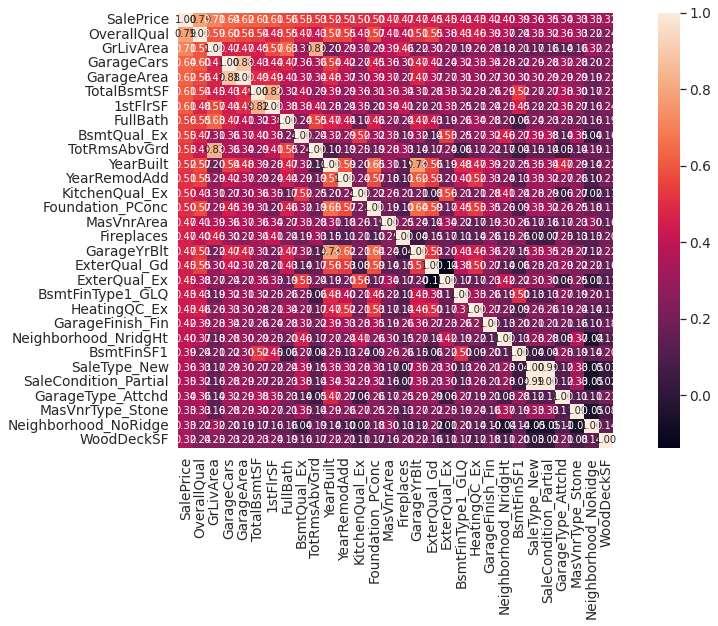

In [206]:
k = 30 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
print(corrmat.nlargest(k, 'SalePrice')['SalePrice'])
print(corrmat.nlargest(k, 'SalePrice')['SalePrice'].shape)
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Checking Existence of Categorical Values

In [207]:
train["FullBath"].unique()

array([2, 1, 3, 0])

In [208]:
train = train[cols]
print(train.shape)
print(train.columns)

if set(categorical_cols).issubset(train.columns):
    print("categorical variabels are found in the training dataset")
else: 
    print("categorical variabels are not existed in the training dataset")

(1460, 30)
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc',
       'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'ExterQual_Gd',
       'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'GarageFinish_Fin',
       'Neighborhood_NridgHt', 'BsmtFinSF1', 'SaleType_New',
       'SaleCondition_Partial', 'GarageType_Attchd', 'MasVnrType_Stone',
       'Neighborhood_NoRidge', 'WoodDeckSF'],
      dtype='object')
categorical variabels are not existed in the training dataset


## Kendall Tau Feature Selection

<AxesSubplot:>

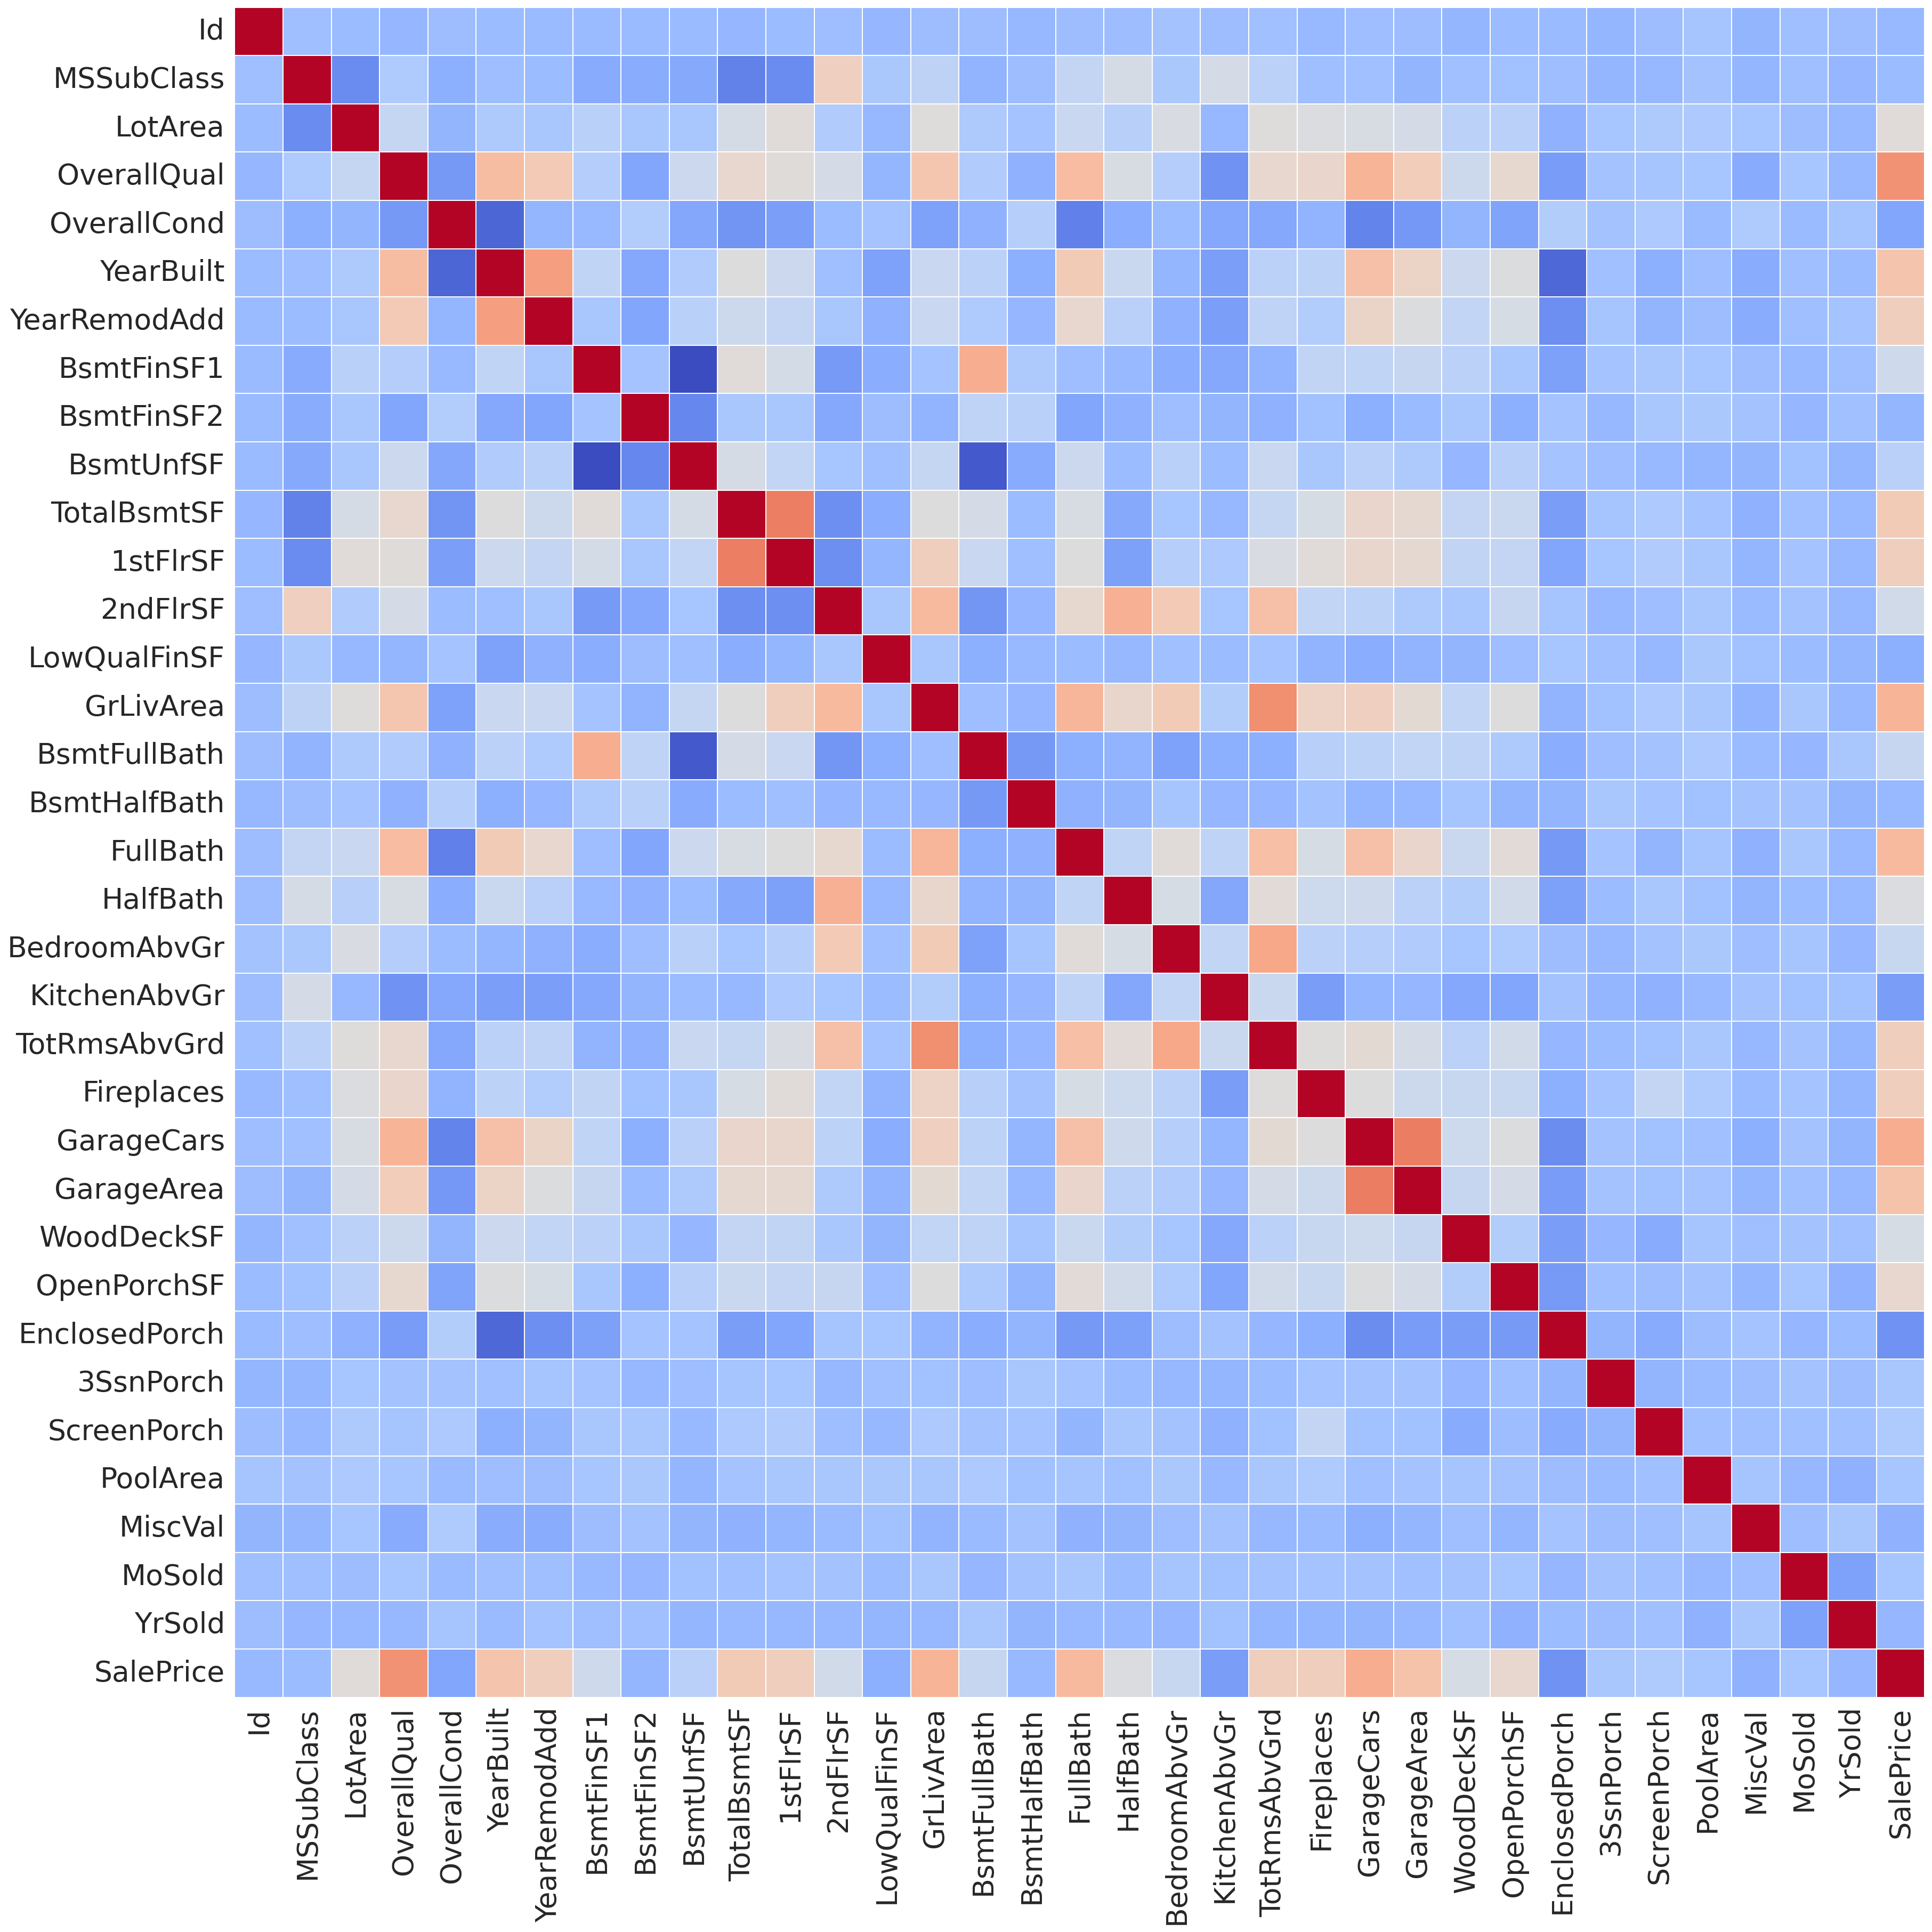

In [209]:
# kendalltau
from scipy.stats import kendalltau

kendall_corr = HousePrice.corr(method='kendall')
plt.figure(figsize=(30, 30), dpi=140)
sb.set(font_scale=2.5)
sb.heatmap(kendall_corr, 
           xticklabels=kendall_corr.columns.values, 
           yticklabels=kendall_corr.columns.values, 
           cmap="coolwarm",
          annot=False, linewidths=1, square= True, cbar=False, fmt='.1f')

In [210]:
# Spearman 
print("Strong Contenders")
print(HousePrice["SalePrice"].corr(HousePrice["GarageCars"], method="spearman"))
print(HousePrice["SalePrice"].corr(HousePrice["OverallQual"], method="spearman"))
print(HousePrice["SalePrice"].corr(HousePrice["YearBuilt"], method="spearman"))
print("")
print("Weak Contenders")
print(HousePrice["SalePrice"].corr(HousePrice["Id"], method="spearman"))
print(HousePrice["SalePrice"].corr(HousePrice["KitchenAbvGr"], method="spearman"))
print(HousePrice["SalePrice"].corr(HousePrice["BsmtFinSF2"], method="spearman"))

Strong Contenders
0.6907109670497434
0.8098285862017292
0.6526815462850586

Weak Contenders
-0.01854562453597749
-0.1648257549850205
-0.038806132045894184


### Linear Regression

In [211]:
from sklearn.model_selection import train_test_split
train_for_lasso = train
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

In [212]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [213]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [214]:
    lm.fit(X_train,y_train)
    print(lm)

LinearRegression()


In [215]:
# print the intercept
print(lm.intercept_)

[4.35904597e-17]


In [216]:
predictions = lm.predict(X_test)

In [217]:
predictions= predictions.reshape(-1,1)

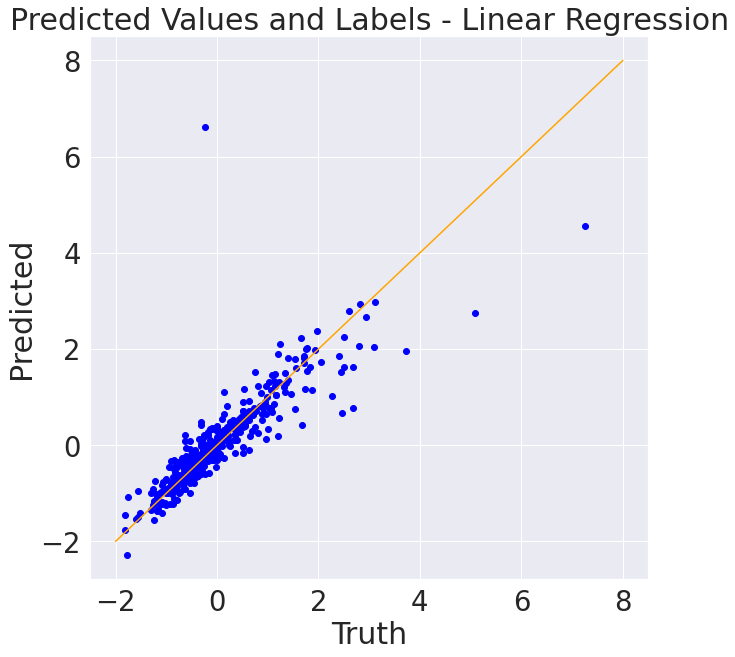

In [218]:
# plt.figure(figsize=(15,8))
# plt.scatter(y_test,predictions,  c='blue')
# plt.xlabel('Y Test')
# ax.plot([-2, 6], [-2,6])
# plt.ylabel('Y Prediction')
# plt.show()



fig= plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(y_test,predictions,  c='blue')
ax.plot([-2, 8], [-2,8], color ='orange')
ax.set_xlabel('Truth')
ax.set_ylabel('Predicted')
ax.set_title('Predicted Values and Labels - Linear Regression')
plt.show()

In [219]:
# plt.figure(figsize=(16,8))
# plt.plot(y_test,label ='Test')
# plt.plot(predictions, label = 'predict')
# plt.show()

In [220]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.25302552694349356
MSE: 0.24921242940764682
RMSE: 0.4992118081612722


In [221]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', C=1, epsilon=0.05)
svr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, epsilon=0.05)

In [222]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1) 

In [223]:
print('MAE   :', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE   :', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE  :', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE   : 0.2523005179316991
MSE   : 0.2244612081756197
RMSE  : 0.47377337216819154


### Support Vector Regression

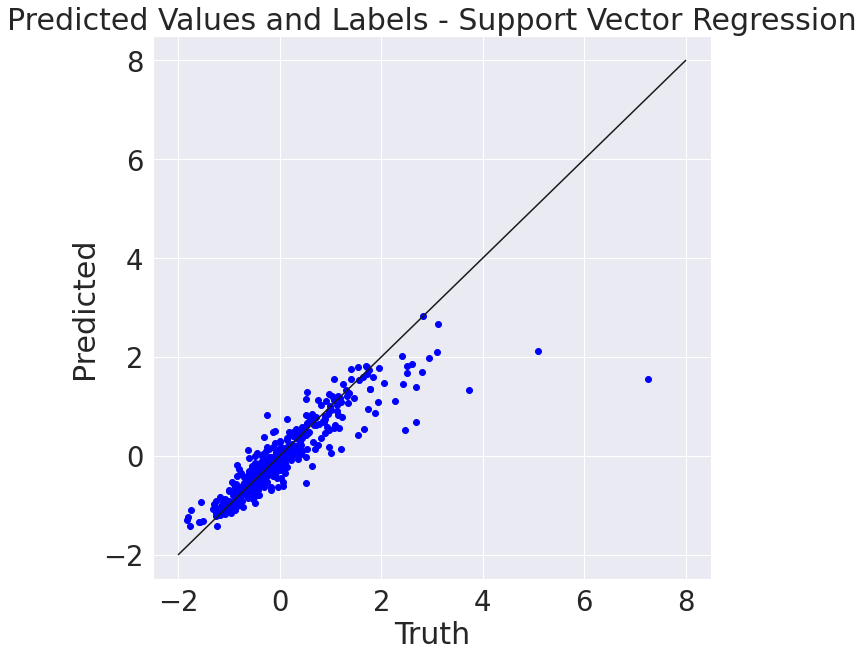

In [224]:
# plt.figure(figsize=(15,8))
# plt.scatter(y_test,svr_pred, c='red')
# plt.xlabel('Y Test')
# plt.ylabel('Y Prediction')
# plt.axis('equal')
# plt.show()

fig= plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(y_test,svr_pred,  c='blue')
ax.plot([-2, 8], [-2,8], color ='k')
ax.set_xlabel('Truth')
ax.set_ylabel('Predicted')
ax.set_title('Predicted Values and Labels - Support Vector Regression')
plt.show()

In [225]:
# plt.figure(figsize=(16,8))
# plt.plot(y_test,label ='Test')
# plt.plot(svr_pred, label = 'predict')
# plt.show()

### Decision Tree Regression

In [226]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [227]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [228]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.33658691312404704
MSE: 0.24626412262411965
RMSE: 0.4962500605784544


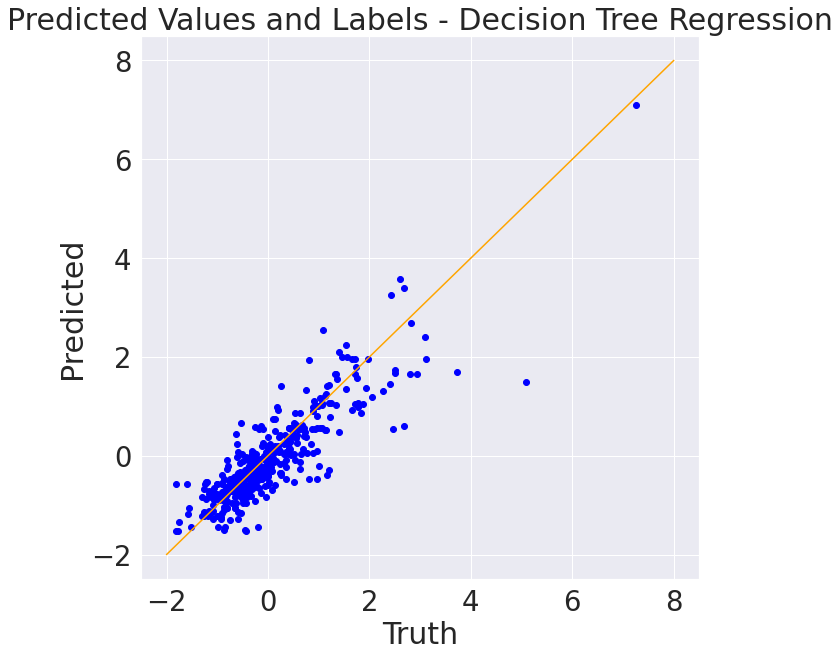

In [229]:
# plt.figure(figsize=(15,8))
# plt.scatter(y_test,dtr_pred,c='green')
# plt.xlabel('Y Test')
# plt.ylabel('Y Prediction')
# plt.show()



fig= plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(y_test,dtr_pred,  c='blue')
ax.plot([-2, 8], [-2,8], color ='orange')
ax.set_xlabel('Truth')
ax.set_ylabel('Predicted')
ax.set_title('Predicted Values and Labels - Decision Tree Regression')
plt.show()

### Lasso Regression

In [230]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

model = Lasso(alpha=0.01, precompute=True, positive=True, selection='random', random_state=42)
model.fit(X_train, y_train)

lasso_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print('Train set evaluation:')
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))

MAE: 0.25154523748179847
MSE: 0.2483437160702538
RMSE: 0.49834096366870523
Train set evaluation:
MSE: 0.2483437160702538


The best value of Alpha is:  {'alpha': 0.0096} 0.8419060173741642
0.8613696782155656
0.7516616842314784
MAE: 0.25156535876229935
MSE: 0.24833831576852158
RMSE: 0.49833554535927055
Train set evaluation:
MSE: 0.24833831576852158


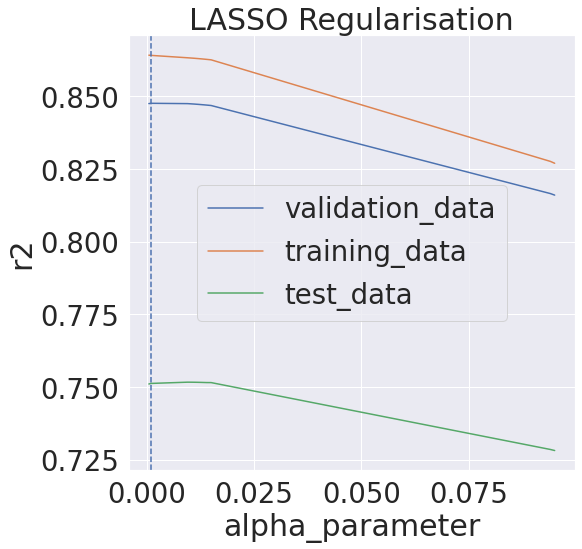

Chosen alpha: 0.00100
Validation score: 0.84762
Test score at chosen alpha: 0.75123


In [231]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import r2_score, get_scorer

Lasso_reg  = Lasso()
parameters = {'alpha':[x for x in [0.0005,0.001,0.0099, 0.0098, 0.0097, 0.0096, 0.095, 0.094, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.03, 0.04, 0.05]]}

##### Grid Search Cross Validation #####
Lasso_reg=GridSearchCV(model, param_grid=parameters)
Lasso_reg.fit(X_train, y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_,Lasso_reg.best_score_)


Lasso_reg =Lasso(alpha=0.0096)
Lasso_reg.fit(X_train, y_train)
y_pred_train = Lasso_reg.predict(X_train)
y_pred_test  = Lasso_reg.predict(X_test)
#####


train_score = Lasso_reg.score(X_train, y_train)
print(train_score)
test_score = Lasso_reg.score(X_test, y_test)
print(test_score)
#####
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print('Train set evaluation:')
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))




def regmodel_param_plot( validation_score, train_score, alphas_to_try, chosen_alpha, scoring, model_name, test_score = None, filename = None):
    plt.figure(figsize = (8,8))
    sns.lineplot(y = validation_score, x = alphas_to_try, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = alphas_to_try, 
                 label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    if test_score is not None:
        sns.lineplot(y = test_score, x = alphas_to_try, 
                     label = 'test_data')
    plt.xlabel('alpha_parameter')
    plt.ylabel(scoring)
    plt.title(model_name + ' Regularisation')
    plt.legend()
    if filename is not None:
        plt.savefig(str(filename) + ".png")
    plt.show()



def regmodel_param_test( alphas_to_try, X, y, cv, scoring = 'r2', model_name = 'LASSO', X_test = None, y_test = None, draw_plot = False, filename = None):
    validation_scores = []
    train_scores = []
    results_list = []
    if X_test is not None:
        test_scores = []
        scorer = get_scorer(scoring)
    else:
        test_scores = None

    for curr_alpha in alphas_to_try:
        
        if model_name == 'LASSO':
            regmodel = Lasso(alpha = curr_alpha)
        elif model_name == 'Ridge':
            regmodel = Ridge(alpha = curr_alpha)
        else:
            return None

        results = cross_validate(
            regmodel, X, y, scoring=scoring, cv=cv, 
            return_train_score = True)

        validation_scores.append(np.mean(results['test_score']))
        train_scores.append(np.mean(results['train_score']))
        results_list.append(results)

        if X_test is not None:
            regmodel.fit(X,y)
            y_pred = regmodel.predict(X_test)
            test_scores.append(scorer(regmodel, X_test, y_test))
    
    chosen_alpha_id = np.argmax(validation_scores)
    chosen_alpha = alphas_to_try[chosen_alpha_id]
    max_validation_score = np.max(validation_scores)
    if X_test is not None:
        test_score_at_chosen_alpha = test_scores[chosen_alpha_id]
    else:
        test_score_at_chosen_alpha = None
        
    if draw_plot:
        regmodel_param_plot(
            validation_scores, train_scores, alphas_to_try, chosen_alpha, 
            scoring, model_name, test_scores, filename)
    
    return chosen_alpha, max_validation_score, test_score_at_chosen_alpha


my_random_state = 1
cv = KFold(n_splits=5, shuffle=True, random_state=my_random_state)

alpha_list = [0.0005,0.001, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.094, 0.095]

chosen_alpha, max_validation_score, test_score_at_chosen_alpha = \
    regmodel_param_test(
        alpha_list, X_train, y_train, 
        cv, scoring = 'r2', model_name = 'LASSO', 
        X_test = X_test, y_test = y_test, 
        draw_plot = True, filename = 'lasso_wide_search')
print("Chosen alpha: %.5f" % \
    chosen_alpha)
print("Validation score: %.5f" % \
    max_validation_score)
print("Test score at chosen alpha: %.5f" % \
    test_score_at_chosen_alpha)

In [232]:
train_score = model.score(X_train, y_train)
print(train_score)
test_score = model.score(X_test, y_test)
print(test_score)

0.8613284249788434
0.7516562839297463


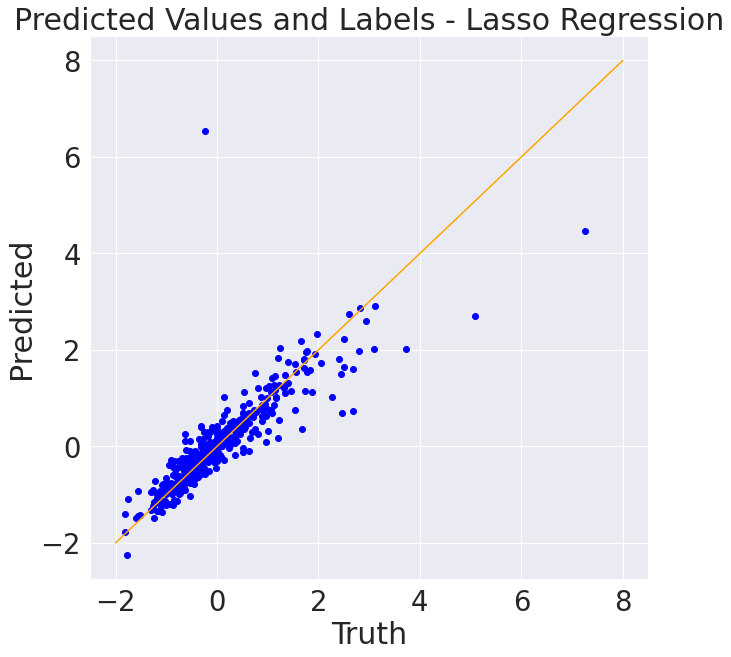

In [233]:
# plt.figure(figsize=(15,8))
# plt.scatter(y_test, test_pred, c='blue')
# plt.xlabel('Y Test')
# plt.ylabel('Y Prediction')
# plt.show()


fig= plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(y_test,lasso_pred,  c='blue')
ax.plot([-2, 8], [-2,8], color ='orange')
ax.set_xlabel('Truth')
ax.set_ylabel('Predicted')
ax.set_title('Predicted Values and Labels - Lasso Regression')
plt.show()

### Ridge Regression

In [234]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=10, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
ridge_pred = model.predict(X_test)
train_pred = model.predict(X_train)



print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('Train set evaluation:')
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))


# results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
# results_df = results_df.append(results_df_2, ignore_index=True)

MAE: 0.2533226498760481
MSE: 0.24818278759939577
RMSE: 0.49817947328186435
Train set evaluation:
MSE: 0.24818278759939577


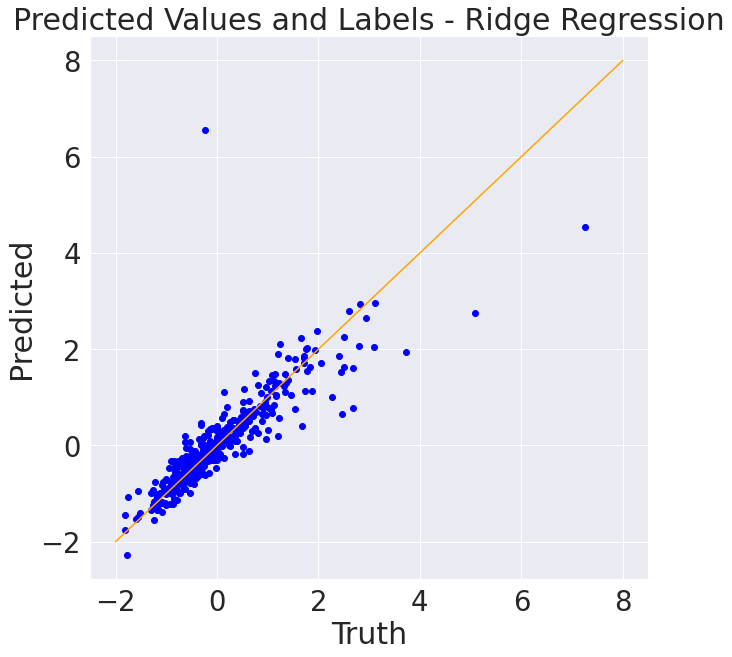

In [235]:
fig= plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(y_test, ridge_pred,  c='blue')
ax.plot([-2, 8], [-2,8], color ='orange')
ax.set_xlabel('Truth')
ax.set_ylabel('Predicted')
ax.set_title('Predicted Values and Labels - Ridge Regression')
plt.show()

### Gridsearch Cross Validation 2

In [236]:
# # Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

# params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
# lasso = Lasso(normalize=True)
# lasso_model = GridSearchCV(lasso, params, cv = 10)
# lasso_model.fit(X_train, y_train)
# print(lasso_model.best_params_)
# print(lasso_model.best_score_)

In [237]:

# Training_Accuracy_Before = []
# Testing_Accuracy_Before = []
# Training_Accuracy_After = []
# Testing_Accuracy_After = []

# # Using value of alpha as 0.0000171 to get best accuracy for Lasso Regression


# lasso = Lasso(alpha = 0.0000171, normalize = True)
# lasso.fit(X_train, y_train)

# train_score = lasso.score(X_train, y_train)
# print(train_score)
# test_score = lasso.score(X_test, y_test)
# print(test_score)

# Training_Accuracy_Before.append(train_score)
# Testing_Accuracy_Before.append(test_score)

In [238]:
# coefficients = lasso.coef_
# coefficients
# print(len(coefficients))

In [239]:
# temp = []
# for i, element  in enumerate(coefficients):
#     if element < 0:
#         temp.append(i)
# print(temp)



# train_for_lasso = train_for_lasso.drop(train_for_lasso.columns[temp],axis = 1)

# X_train, X_test, y_train, y_test = train_test_split(train_for_lasso.drop('SalePrice', axis=1), train_for_lasso['SalePrice'], test_size=0.3, random_state=101)


# # y_train = y_train.drop(df.columns[temp],axis = 1)

# # we are going to scale to data

# y_train= y_train.values.reshape(-1,1)
# y_test= y_test.values.reshape(-1,1)

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)
# y_train = sc_X.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)




In [240]:
# plt.figure(figsize = (10, 6))
# plt.plot(range(len(X_train.columns)), coefficients)
# plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
# plt.show()

In [241]:
# # Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

# params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
# lasso = Lasso(normalize=True)
# lasso_model = GridSearchCV(lasso, params, cv = 10)
# lasso_model.fit(X_train, y_train)
# print(lasso_model.best_params_)
# print(lasso_model.best_score_)

In [242]:
# # Using value of alpha as 0.000705 to get best accuracy for Lasso Regression
# lasso = Lasso(alpha = 0.000705, normalize = True)
# lasso.fit(X_train, y_train)

# train_score = lasso.score(X_train, y_train)
# print(train_score)
# test_score = lasso.score(X_test, y_test)
# print(test_score)

# Training_Accuracy_After.append(train_score)
# Testing_Accuracy_After.append(test_score)



# lasso_pred = lasso.predict(X_test)
# train_pred = lasso.predict(X_train)

# print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
# print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

### Feature Selection using SKlearn

In [243]:
# from sklearn.feature_selection import SelectKBest, mutual_info_regression
# #Select top 2 features based on mutual info regression
# selector = SelectKBest(mutual_info_regression, k =2)
# selector.fit(X, y)
# X.columns[selector.get_support()]

In [244]:

train = train.select_dtypes('number').dropna()
#Divide the features into Independent and Dependent Variable
X = train[["OverallQual", "GrLivArea"]]
y = train[["SalePrice"]]

In [245]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =2)
selector.fit(X, y)
X.columns[selector.get_support()]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['OverallQual', 'GrLivArea'], dtype='object')

In [246]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 2, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Index(['OverallQual', 'GrLivArea'], dtype='object')